In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import gensim
import string
import re

C:\Users\Gaurav\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
# read .txt file line by line, split by tab(\t)
list_data=[]
with open('C:\\Users\\Gaurav\\Desktop\\ISI forms\\Project\\il5_uromo.txt',encoding='utf8',errors='ignore') as fp:
    for line in fp:
        list_data.append(line.split('\t'))
    
    
    

In [7]:
# name the columns of datframe
raw_data = pd.DataFrame(list_data,columns=['doc_id','text_data','class_type']) 

In [8]:
raw_data.head(2)

,doc_id,text_data,class_type
0,IL5_SN_000370_20170213_H0T00370Z,#Eritrea #ارتريا ባዓል ፈንቅል ኣብ ከተማ ሮተርዳም ፳፻፲፯ – ...,nondomain\n
1,IL5_WL_020506_20160616_H0040MDW3,ሰበ ስልጣን ስርዓት ኢህወደግ ኣብ ጐኒ ውድብ ብኣዴን ተሰሊፎም ንዝተቓለሱ...,unk\n


In [9]:
raw_data.class_type.value_counts()

unk\n              3505
nondomain\n         837
indomain\n          467
eval_incident\n     160
Name: class_type, dtype: int64

In [10]:
# strip columns for leading and trailing white spaces
raw_data['doc_id']=raw_data.doc_id.str.strip()
raw_data['text_data']=raw_data.text_data.str.strip()
raw_data['class_type']=raw_data['class_type'].str.strip()

In [11]:
raw_data.shape

(4969, 3)

In [12]:
# set doc_id as index
raw_data= raw_data.set_index('doc_id')
# change "class_type" column to categorical datatype
raw_data['class_type'] = raw_data['class_type'].astype('category')

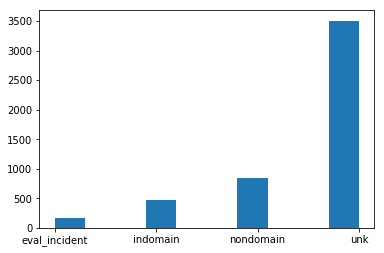

In [13]:
# Class Count
#raw_data['class_type'].value_counts(dropna=False)
plt.hist('class_type',data=raw_data)
plt.show()

In [14]:
# http links removal on 'text_data' column

# regex : ((http|https)://t.co/[a-zA-Z0-9]+)

import re
raw_data['text_data'] = raw_data['text_data'].apply(lambda x: re.sub('((http|https)://t.co/[a-zA-Z0-9]+)','',x))

In [15]:
raw_data.loc['IL5_SN_000370_20160628_H0T000Y2W','text_data']


'ህቡብ ስነጥበባዊ ኣቶ ትካቦ ወልደማርያም ዓሪፎም ፣ ሎሚ ሓመድ ኣዳም ለቢሶም #Eritrea '

In [16]:
#punctuation removal on 'text_data' column
#print(string.punctuation)
punct='!"$%&()*+,-./:;<=>?[\]^_`{|}~'+"'"
#print(punct)
regex = re.compile('[%s]' % re.escape(punct))

raw_data['text_data'] = raw_data['text_data'].apply(lambda x: regex.sub('', x))
raw_data['text_data']=raw_data.text_data.str.strip()

In [26]:
raw_data=raw_data.reset_index()

In [28]:
raw_data.text_data

0       #Eritrea #ارتريا ባዓል ፈንቅል ኣብ ከተማ ሮተርዳም ፳፻፲፯ – ...
1       ሰበ ስልጣን ስርዓት ኢህወደግ ኣብ ጐኒ ውድብ ብኣዴን ተሰሊፎም ንዝተቓለሱ...
2       መብርሂ ኣምባሳደር ግርማ ኣስመሮም ንወተሃደራዊ ጸብጻብ ኤርትራ ኣብ ዝተኻ...
3       ትላንት ምሽት በትግራይ ክልል በጣለው ዝናብ ምክንያት የመኪና አደጋ በመድ...
4       ህግደፍ ፡ ዳግማይ ገንዘብ ህዝቢ ይዘምት  Undue control of pr...
5       “ 800000 ስደተኛታት ን ኤሮጳ ክሰግሩ ኣብ ሊብያ ተኣኪቦም ኣለዉ ” ...
6       BREAKING ፕት ዶር ሙላቱ ለ8 አምባሳደሮች ሹመት ሰጡ ሬድዋን ሁሴን ...
7       ኣህጉራዊ መዓልቲ ምጥፋእ መሃይምነት ኣብ ኣስመራ ኤርትራ 8መስከረም ተዘኪ...
8                             በኮሜዲያን ቶማስ አዳዲስ ቀልዶች ዘና ይበሉ
9       ፕረዝደንት ኦባማ ዝዓበየ ሽልማት መዳልያ ነጻነት ሂቦም  #Obama #Wh...
10      ኣብ ክልል ትግራይ ዞባ ደቡብ ወረዳ ኣላማጣ ዝርከቡ ገባራት ብድርቂ ንዝተ...
11      RT@Reuters Burundi army officer says dismisses...
12                 ቻይናዊት ከተማ ናንጂንግ ናይ ዱር ህንጻ ክሃንጽ እያ ኢላ ።
13      ተጋዳላይ መለስ ዜናዊ 11ለካቲት 1984 ዓም ኣብ ከተማ መቐለ እንትኽበር...
14      ብሓሮ ብሓሮ ብሌና ብሌና ረድዮ ረድዮ ሎዛን ሎዛን ስዊስትል ስዊስትል ዕለ...
15      ከቢድ ተኩስ ድምጺ ነታጉን ንከተማ ሞቃዲሾ የናውጽ  ኣብ ርእሰ ከተማ ሶማ...
16      ፅንዓት ይሃብ         ኣባላት  ማርሽ ባንድ ትግራይ  ኣብ ኣኽሱም ኣ...
17      የካቲት 3

In [18]:
# drop documents with less n words

In [19]:
#train test split # stratified sampling

In [20]:
#smiley removal